In [229]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
%config InlineBackend.figure_formats = ['svg']
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [ ]:
all_batting_df = pd.read_pickle("full_batting_from_1950_df.pkl")
all_batting_df.head()

In [ ]:
# group by years and average homeruns
avg_homeruns = all_batting_df.groupby(["Year"])[['HR']].mean()
avg_homeruns

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
plt.plot(avg_homeruns)

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
for team in all_batting_df.sort_values(by="Year").Team.unique():
    sb = all_batting_df[all_batting_df["Team"] == team].sort_values(by="Year")[["Year", "HR"]]
    plt.plot(sb["Year"], sb["HR"], '.')

In [ ]:
avg_sbs = all_batting_df.groupby(["Year"])[['SB']].mean()
avg_sbs

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
plt.plot(avg_sbs)

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
for team in all_batting_df.sort_values(by="Year").Team.unique():
    sb = all_batting_df[all_batting_df["Team"] == team].sort_values(by="Year")[["Year", "SB"]]
    plt.plot(sb["Year"], sb["SB"], '.')
    

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
sb = all_batting_df[all_batting_df["Team"] == 'OAK'].sort_values(by="Year")[["Year", "SB"]]
plt.plot(sb["Year"], sb["SB"], '.');

In [ ]:
avg_sos = all_batting_df.groupby(["Year"])[['SO']].mean()
avg_sos

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 76, step=3), rotation=45)
plt.plot(avg_sos)

# Full Baseball DF

In [2]:
# grab the full baseball dataframe and remove 2020
bad_years = [1981, 1994, 1995, 2020]
full_season = 162
full_baseball_df = pd.read_pickle("full_baseball_from_1950_df.pkl")
print(len(full_baseball_df.index))
full_baseball_df = full_baseball_df[(full_baseball_df["G"] == 162)]
print(len(full_baseball_df.index))
full_baseball_df.head()

1772
1150


,Year,Team,Lg,W,L,Finish,G,PA,AB,R,...,HRA,BB_A,SO_A,WHIP,SO9,HR9,E_P,DP_P,Fld%_P,PAge
1,2019,ARI,NL West,85,77,2,162,39.0,34.77,5.02,...,1.36,3.19,8.81,1.308,8.77,1.35,0.53,0.84,0.986,28.6
2,2018,ARI,NL West,82,80,3,162,38.0,33.70,4.28,...,1.07,3.22,8.94,1.254,8.91,1.07,0.46,0.94,0.988,29.6
3,2017,ARI,NL West,93,69,2,162,38.4,34.10,5.01,...,1.06,3.19,9.15,1.266,9.26,1.07,0.67,0.86,0.982,28.7
4,2016,ARI,NL West,69,93,4,162,38.6,34.97,4.64,...,1.25,3.72,8.14,1.492,8.17,1.25,0.62,0.88,0.983,26.4
5,2015,ARI,NL West,79,83,3,162,38.7,34.87,4.44,...,1.12,3.09,7.50,1.330,7.46,1.12,0.53,0.90,0.986,27.1


In [3]:
# look at all the columns
len(full_baseball_df.columns), full_baseball_df.columns

(45,
 Index(['Year', 'Team', 'Lg', 'W', 'L', 'Finish', 'G', 'PA', 'AB', 'R', 'H',
        '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
        'OPS', 'E', 'DP', 'Fld%', 'RA/G', 'ERA', 'CG', 'tSho', 'SV', 'IP',
        'H_A', 'R_A', 'ER', 'HRA', 'BB_A', 'SO_A', 'WHIP', 'SO9', 'HR9', 'E_P',
        'DP_P', 'Fld%_P', 'PAge'],
       dtype='object'))

In [4]:
# add run differential and singles
full_baseball_df["RD"] = full_baseball_df["R"] - full_baseball_df["RA/G"]
full_baseball_df["1B"] = full_baseball_df["H"] - full_baseball_df["2B"] - full_baseball_df["3B"] - full_baseball_df["HR"]

In [5]:
# create two "masks" one for pure stats, and one for avg stats
offensive_pure = ['W', 'PA', 'R', '1B', '2B', '3B', 'HR', 'BB', 'RBI', 'SB', 'SO', 'E']
offensive_pure_runs = ['R', '1B', '2B', '3B', 'HR', 'BB', 'SB', 'SO', 'E']
offensive_avgs = ['R','OBP', 'SLG', 'BA', 'E' ]


In [6]:
full_baseball_df[offensive_pure].corr()

,W,PA,R,1B,2B,3B,HR,BB,RBI,SB,SO,E
W,1.000000,0.407831,0.507909,0.166435,0.200016,0.042785,0.280561,0.378486,0.491833,0.129489,-0.094236,-0.263686
PA,0.407831,1.000000,0.800459,0.356417,0.500792,0.019996,0.425487,0.696703,0.787103,0.028072,-0.035835,-0.154192
R,0.507909,0.800459,1.000000,0.188393,0.654682,-0.023577,0.708397,0.528517,0.994677,0.048246,0.107087,-0.316746
1B,0.166435,0.356417,0.188393,1.000000,-0.072331,0.312286,-0.387820,-0.005683,0.146045,0.224041,-0.685651,0.262916
2B,0.200016,0.500792,0.654682,-0.072331,1.000000,-0.115810,0.489113,0.153281,0.682447,-0.008315,0.331879,-0.517647
3B,0.042785,0.019996,-0.023577,0.312286,-0.115810,1.000000,-0.344218,-0.103862,-0.055219,0.238832,-0.301513,0.269940
HR,0.280561,0.425487,0.708397,-0.387820,0.489113,-0.344218,1.000000,0.299041,0.740930,-0.238777,0.515648,-0.429601
BB,0.378486,0.696703,0.528517,-0.005683,0.153281,-0.103862,0.299041,1.000000,0.511253,0.066497,-0.009818,-0.034730
RBI,0.491833,0.787103,0.994677,0.146045,0.682447,-0.055219,0.740930,0.511253,1.000000,0.021639,0.152298,-0.354251
SB,0.129489,0.028072,0.048246,0.224041,-0.008315,0.238832,-0.238777,0.066497,0.021639,1.000000,-0.160578,0.067872


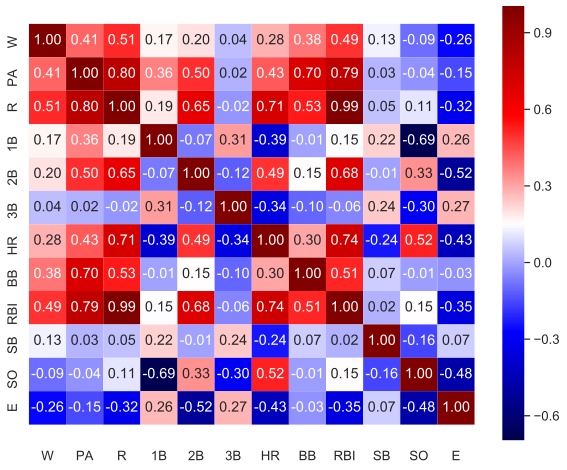

In [7]:
# plot heat map of traditional
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(full_baseball_df[offensive_pure].corr(), cmap="seismic", annot=True, vmin=-.7, vmax=1,  fmt=".2f");
plt.gca().set_ylim(len(full_baseball_df[offensive_pure].corr())+0.5, -0.5);

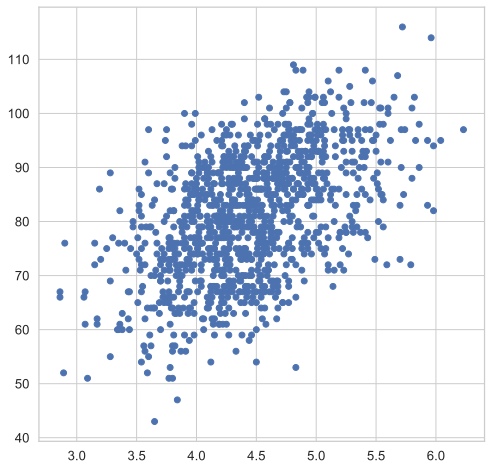

In [8]:
# plot Run Diff vs Wins
f, ax = plt.subplots(figsize=(8, 8))
ax = plt.scatter(full_baseball_df["R"], full_baseball_df["W"]);

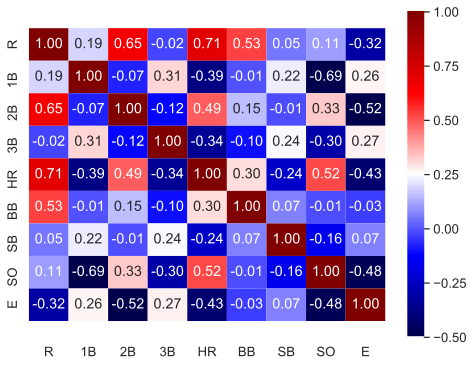

In [9]:
# plot heat map of traditional to see relationship with runs
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(full_baseball_df[offensive_pure_runs].corr(method='pearson'), cmap="seismic", annot=True, vmin=-.5, vmax=1,  fmt=".2f");
plt.gca().set_ylim(len(full_baseball_df[offensive_pure_runs].corr())+0.5, -0.5);

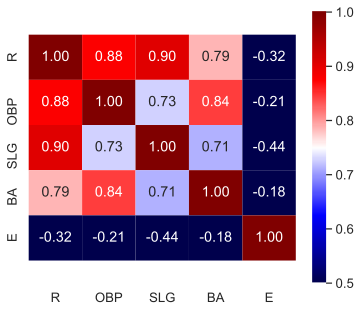

In [10]:
# plot heat map of traditional
f, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(full_baseball_df[offensive_avgs].corr(method='pearson'), cmap="seismic", annot=True, vmin=.5, vmax=1,  fmt=".2f");
plt.gca().set_ylim(len(full_baseball_df[offensive_avgs].corr())+0.5, -0.5);

# Get From OBP SLG AVG to Run Scored

In [11]:
y = full_baseball_df["R"]

sr_slg = StandardScaler()
scaled_slg = sr_slg.fit_transform(full_baseball_df[["SLG"]])
lr_slg = LinearRegression()
lr_slg.fit(scaled_slg, y)

sr_ba = StandardScaler()
scaled_ba = sr_ba.fit_transform(full_baseball_df[["BA","SLG"]])
lr_ba = LinearRegression()
lr_ba.fit(scaled_ba, y)

sr_obp = StandardScaler()
scaled_obp = sr_obp.fit_transform(full_baseball_df[["OBP","SLG"]])
lr_obp = LinearRegression()
lr_obp.fit(scaled_obp, y)

sr_all = StandardScaler() 
scaled_all = sr_all.fit_transform(full_baseball_df[["OBP", "BA", "SLG"]])
lr_all = LinearRegression()
lr_all.fit(scaled_all, y)

print("SLG Only: ", lr_slg.score(scaled_slg, y), lr_slg.coef_)
print("SLG and BA: ", lr_ba.score(scaled_ba, y), lr_ba.coef_)
print("OBP and BA: ", lr_obp.score(scaled_obp, y), lr_obp.coef_)
print("ALL: ", lr_all.score(scaled_all, y), lr_all.coef_)

SLG Only:  0.818063406637364 [0.4936794]
SLG and BA:  0.8590750033313767 [0.15745864 0.3815413 ]
OBP and BA:  0.9210667605721082 [0.25555738 0.30760798]
ALL:  0.9214925097895567 [ 0.27072199 -0.02183221  0.31211497]


In [12]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
x = full_baseball_df[["OBP", "SLG"]]

# Choose the response variable
y = full_baseball_df["R"]

# Fit the model 
avg_to_run_model = lr.fit(x, y)
lr.score(x, y)

0.9210667605721082

In [13]:
lr.intercept_, lr.coef_

(-5.093475289509668, array([17.43734807,  9.60579612]))

### Equation 
runs_scored = (17.44 * OBP) + (9.61 * SLG) - 5.1

# Add in opponent stats

In [14]:
opponent_df = pd.read_pickle("opponents_from_1950_df.pkl")
opponent_df_important = opponent_df[["Year", "Team", "BA", "OBP", "SLG"]]
opponent_df_important.head()

,Year,Team,BA,OBP,SLG
0,1950,BOS,0.270,0.364,0.400
1,1950,LAD,0.262,0.338,0.410
2,1950,ATL,0.263,0.335,0.387
3,1950,CHC,0.271,0.346,0.402
4,1950,CHW,0.263,0.356,0.374


In [15]:
opponent_df_important.rename(columns={"BA":"BA_A", "OBP":"OBP_A", "SLG":"SLG_A"}, inplace=True)
opponent_df_important.head()

/Users/ryanwerth/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Year,Team,BA_A,OBP_A,SLG_A
0,1950,BOS,0.270,0.364,0.400
1,1950,LAD,0.262,0.338,0.410
2,1950,ATL,0.263,0.335,0.387
3,1950,CHC,0.271,0.346,0.402
4,1950,CHW,0.263,0.356,0.374


In [16]:
important_df = pd.merge(full_baseball_df[["Year", "Team","W", "R", "RA/G", "OBP", "BA", "SLG"]], opponent_df_important, on=["Year", "Team"])


In [17]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
x = important_df[["OBP", "SLG", "OBP_A", "SLG_A"]]

# Choose the response variable
y = important_df["W"]

# Fit the model 
run_model = lr.fit(x, y)
lr.score(x, y)

0.8137754082715954

In [18]:
y = important_df["W"]
sr = StandardScaler() 
scaled = sr_all.fit_transform(important_df[["OBP", "SLG", "OBP_A", "SLG_A"]])
lr = LinearRegression()
lr.fit(scaled, y)
lr.coef_

array([ 4.61040741,  4.72809879, -5.27804017, -4.62747141])

In [19]:
important_df["win_diff"] = important_df["W"] - run_model.predict(important_df[["OBP", "SLG", "OBP_A", "SLG_A"]])

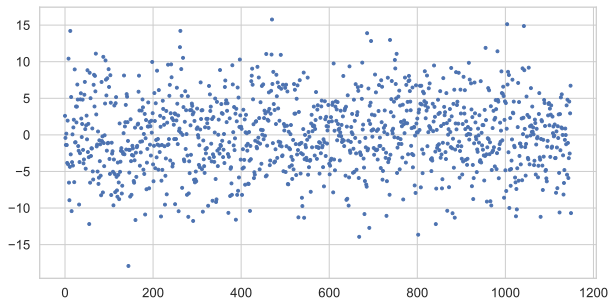

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.plot(important_df["win_diff"], '.');

In [21]:
important_df[important_df["win_diff"] > 15]

,Year,Team,W,R,RA/G,OBP,BA,SLG,BA_A,OBP_A,SLG_A,win_diff
470,2008,ANA,100,4.72,4.30,0.33,0.268,0.413,0.261,0.323,0.406,15.765869
1004,1987,STL,95,4.93,4.28,0.34,0.263,0.378,0.266,0.331,0.404,15.123836


In [22]:
important_df[important_df["win_diff"] < -15]

,Year,Team,W,R,RA/G,OBP,BA,SLG,BA_A,OBP_A,SLG_A,win_diff
144,1965,BOS,62,4.13,4.88,0.327,0.251,0.4,0.26,0.327,0.407,-17.916906


In [23]:
important_df["win_diff"].abs().mean()

3.9266958774667673

# Validation

In [141]:
important_df = pd.merge(full_baseball_df[["Year", "Team","W", "R", "RA/G", "OBP", "BA", "SLG"]], opponent_df_important, on=["Year", "Team"])
x = important_df[["OBP", "SLG", "OBP_A", "SLG_A"]]
y = important_df["W"]

# hold out 20% of the data for final testing
x, x_test, y, y_test = train_test_split(x, y, test_size=.2)

# split again to have 60% to train and 20% to validate
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25, random_state=3)

In [142]:
#set up the 2 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=50)

In [143]:
#validate

lm.fit(x_train, y_train)
print(f'Linear Regression val R^2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(x_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.819
Ridge Regression val R^2: 0.815


In [77]:
win_model = lm.fit(x,y)
print(f'Linear Regression test R^2: {lm.score(x_test, y_test):.3f}')

Linear Regression test R^2: 0.824


In [78]:
unseen_win_diff = y_test - run_model.predict(x_test)

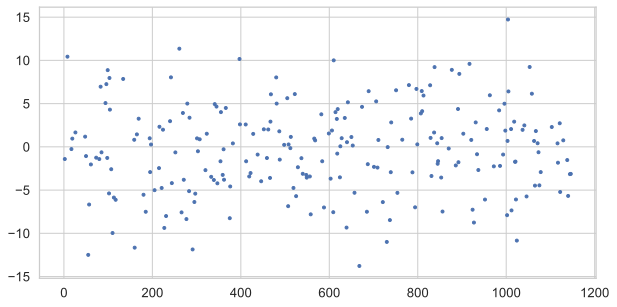

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.plot(unseen_win_diff, '.');

# extrapolating 2020

In [93]:
# grab dataframes and only grab 2020
baseball_2020 = pd.read_pickle("full_baseball_from_1950_df.pkl")
baseball_2020 = baseball_2020[baseball_2020["Year"]==2020]

opponent_2020 = opponent_df[opponent_df["Year"]==2020]
opponent_2020 = opponent_2020[["Year", "Team", "BA", "OBP", "SLG"]]

opponent_2020.rename(columns={"BA":"BA_A", "OBP":"OBP_A", "SLG":"SLG_A"}, inplace=True)
opponent_2020

,Year,Team,BA_A,OBP_A,SLG_A
1742,2020,ARI,0.253,0.336,0.462
1743,2020,ATL,0.247,0.329,0.408
1744,2020,BAL,0.246,0.319,0.421
1745,2020,BOS,0.281,0.365,0.484
1746,2020,CHC,0.233,0.302,0.400
1747,2020,CHW,0.226,0.309,0.379
1748,2020,CIN,0.215,0.303,0.374
1749,2020,CLE,0.223,0.288,0.378
1750,2020,COL,0.280,0.353,0.477
1751,2020,DET,0.265,0.340,0.464


In [95]:
important_df_2020 = pd.merge(baseball_2020[["Year", "Team","W", "R", "RA/G", "OBP", "BA", "SLG"]], opponent_2020, on=["Year", "Team"])

In [96]:
important_df_2020

,Year,Team,W,R,RA/G,OBP,BA,SLG,BA_A,OBP_A,SLG_A
0,2020,ARI,25,4.48,4.92,0.312,0.241,0.391,0.253,0.336,0.462
1,2020,ATL,35,5.80,4.80,0.349,0.268,0.483,0.247,0.329,0.408
2,2020,BAL,25,4.57,4.90,0.321,0.258,0.429,0.246,0.319,0.421
3,2020,BOS,24,4.87,5.85,0.330,0.265,0.445,0.281,0.365,0.484
4,2020,CHC,34,4.42,4.00,0.318,0.220,0.387,0.233,0.302,0.400
5,2020,CHW,35,5.10,4.10,0.326,0.261,0.453,0.226,0.309,0.379
6,2020,CIN,31,4.05,4.05,0.312,0.212,0.403,0.215,0.303,0.374
7,2020,CLE,35,4.13,3.48,0.317,0.228,0.372,0.223,0.288,0.378
8,2020,COL,26,4.58,5.88,0.311,0.257,0.405,0.280,0.353,0.477
9,2020,DET,23,4.29,5.48,0.303,0.245,0.397,0.265,0.340,0.464


In [98]:
important_df_2020["predicted_wins"] = run_model.predict(important_df_2020[["OBP", "SLG", "OBP_A", "SLG_A"]])

In [100]:
important_df_2020["extrapolated_wins"] = important_df_2020["W"] * (162/60)

In [102]:
important_df_2020["win_diff"] = important_df_2020["extrapolated_wins"] - important_df_2020["predicted_wins"]

In [104]:
important_df_2020.sort_values(by=["win_diff"])

,Year,Team,W,R,RA/G,OBP,BA,SLG,BA_A,OBP_A,SLG_A,predicted_wins,extrapolated_wins,win_diff
17,2020,NYM,26,4.77,5.13,0.348,0.272,0.459,0.255,0.336,0.438,88.018407,70.2,-17.818407
12,2020,ANA,26,4.90,5.35,0.332,0.248,0.430,0.245,0.316,0.430,86.230216,70.2,-16.030216
2,2020,BAL,25,4.57,4.90,0.321,0.258,0.429,0.246,0.319,0.421,82.817702,67.5,-15.317702
23,2020,SFG,29,4.98,4.95,0.335,0.263,0.451,0.241,0.322,0.410,91.258100,78.3,-12.958100
18,2020,NYY,33,5.25,4.50,0.342,0.247,0.447,0.236,0.305,0.421,96.886860,89.1,-7.786860
21,2020,PIT,19,3.65,4.97,0.284,0.220,0.357,0.235,0.332,0.416,56.714794,51.3,-5.414794
15,2020,MIL,29,4.12,4.40,0.313,0.223,0.389,0.229,0.307,0.385,83.587918,78.3,-5.287918
13,2020,LAD,43,5.82,3.55,0.338,0.256,0.483,0.213,0.272,0.355,121.243114,116.1,-5.143114
6,2020,CIN,31,4.05,4.05,0.312,0.212,0.403,0.215,0.303,0.374,88.210471,83.7,-4.510471
25,2020,STL,30,4.14,3.95,0.323,0.234,0.371,0.216,0.306,0.380,85.327168,81.0,-4.327168


# model pure data

In [233]:

offensive_pure = ['W', 'G', 'PA', '1B', '2B', '3B', 'HR','BB', 'SB', 'SO']
offensive_against_pure = ['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A','BB_A', 'SB_A', 'SO_A']

combined_features = ['PA', '1B', '2B', '3B', 'HR','BB', 'SB', 'SO', 
                     'PA_A', '1B_A', '2B_A', '3B_A', 'HR_A','BB_A', 'SB_A', 'SO_A']

combined_features_nopa = ['1B', '2B', '3B', 'HR','BB', 'SB', 'SO', 
                     '1B_A', '2B_A', '3B_A', 'HR_A','BB_A', 'SB_A', 'SO_A']

In [191]:
full_baseball_df = pd.read_pickle("full_baseball_from_1950_df.pkl")
full_baseball_df["1B"] = full_baseball_df["H"] - full_baseball_df["2B"] - full_baseball_df["3B"] - full_baseball_df["HR"]
pure_baseball_df = full_baseball_df[["Year", "Team"]+offensive_pure]

In [192]:
opponent_df = pd.read_pickle("opponents_from_1950_df.pkl")
opponent_df["1B"] = opponent_df["H"] - opponent_df["2B"] - opponent_df["3B"] - opponent_df["HR"]
opponent_df.rename(columns={'PA': 'PA_A', '1B':'1B_A', '2B': '2B_A', '3B':'3B_A', 'HR': 'HR_A', 'BB':'BB_A', 'SB': 'SB_A', 'SO': 'SO_A'}, inplace=True)
pure_opponent_df = opponent_df[["Year", "Team"]+offensive_against_pure]

In [193]:
full_pure_df = pd.merge(pure_baseball_df, pure_opponent_df, on=["Year", "Team"])

In [180]:
full_pure_df

,Year,Team,W,G,PA,1B,2B,3B,BB,SB,SO,PA_A,1B_A,2B_A,3B_A,BB_A,SB_A,SO_A
0,2020,ARI,25,60,37.3,5.18,1.68,0.20,3.02,0.38,7.68,2279,284,118,11,235,40,524
1,2019,ARI,85,162,39.0,5.37,1.78,0.25,3.33,0.54,8.40,6230,862,289,29,516,47,1427
2,2018,ARI,82,162,38.0,4.92,1.60,0.31,3.46,0.49,9.01,6139,861,259,19,522,66,1448
3,2017,ARI,93,162,38.4,5.13,1.94,0.24,3.57,0.64,8.99,6072,828,276,34,516,69,1482
4,2016,ARI,69,162,38.6,5.85,1.76,0.35,2.86,0.85,8.81,6437,986,337,38,603,63,1318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,1973,WSN,79,162,38.6,6.22,1.17,0.14,4.29,0.48,4.80,6271,991,201,36,681,76,866
1768,1972,WSN,70,156,37.3,6.00,1.00,0.14,3.04,0.44,5.31,5914,966,178,34,579,73,888
1769,1971,WSN,71,162,37.6,6.16,1.22,0.18,3.35,0.31,4.94,6233,1033,210,42,658,88,829
1770,1970,WSN,73,162,38.6,5.57,1.30,0.22,4.07,0.40,6.00,6347,1009,212,51,716,78,914


In [196]:
pure_per_game = full_pure_df[['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A', 'BB_A', 'SB_A', 'SO_A']].div(full_pure_df.G, axis=0)
full_pure_df[['PA_A', '1B_A', '2B_A', '3B_A', 'HR_A', 'BB_A', 'SB_A', 'SO_A']] = pure_per_game
full_pure_df

,Year,Team,W,G,PA,1B,2B,3B,HR,BB,SB,SO,PA_A,1B_A,2B_A,3B_A,HR_A,BB_A,SB_A,SO_A
0,2020,ARI,25,60,37.3,5.18,1.68,0.20,0.97,3.02,0.38,7.68,37.983333,4.733333,1.966667,0.183333,1.550000,3.916667,0.666667,8.733333
1,2019,ARI,85,162,39.0,5.37,1.78,0.25,1.36,3.33,0.54,8.40,38.456790,5.320988,1.783951,0.179012,1.358025,3.185185,0.290123,8.808642
2,2018,ARI,82,162,38.0,4.92,1.60,0.31,1.09,3.46,0.49,9.01,37.895062,5.314815,1.598765,0.117284,1.074074,3.222222,0.407407,8.938272
3,2017,ARI,93,162,38.4,5.13,1.94,0.24,1.36,3.57,0.64,8.99,37.481481,5.111111,1.703704,0.209877,1.055556,3.185185,0.425926,9.148148
4,2016,ARI,69,162,38.6,5.85,1.76,0.35,1.17,2.86,0.85,8.81,39.734568,6.086420,2.080247,0.234568,1.246914,3.722222,0.388889,8.135802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,1973,WSN,79,162,38.6,6.22,1.17,0.14,0.77,4.29,0.48,4.80,38.709877,6.117284,1.240741,0.222222,0.790123,4.203704,0.469136,5.345679
1768,1972,WSN,70,156,37.3,6.00,1.00,0.14,0.58,3.04,0.44,5.31,37.910256,6.192308,1.141026,0.217949,0.660256,3.711538,0.467949,5.692308
1769,1971,WSN,71,162,37.6,6.16,1.22,0.18,0.54,3.35,0.31,4.94,38.475309,6.376543,1.296296,0.259259,0.820988,4.061728,0.543210,5.117284
1770,1970,WSN,73,162,38.6,5.57,1.30,0.22,0.84,4.07,0.40,6.00,39.179012,6.228395,1.308642,0.314815,1.000000,4.419753,0.481481,5.641975


In [209]:
full_pure_pre_2020 = full_pure_df[full_pure_df["G"]==162]
full_pure_2020 = full_pure_df[full_pure_df["Year"]==2020]

In [234]:
y = full_pure_pre_2020["W"]
sr = StandardScaler() 
scaled = sr.fit_transform(full_pure_pre_2020[combined_features_nopa])
lr = LinearRegression()
win_model = lr.fit(scaled, y)
feature_and_coef = zip(combined_features_nopa , lr.coef_)
for fc in feature_and_coef:
    print(fc[0], fc[1])

1B 3.6870522716398653
2B 2.5213811784850475
3B 0.810780231304991
HR 6.3921835142280745
BB 2.7145093447746502
SB 1.2553820598041021
SO -0.8766477244958266
1B_A -3.5435873816307044
2B_A -2.896315122591212
3B_A -1.223966142627762
HR_A -5.325563586078815
BB_A -2.9546888560825697
SB_A -0.9731981817722459
SO_A 0.6319497111409065


In [235]:
lr.score(scaled, y)

0.8086188499940303

In [236]:
full_pure_pre_2020["Win_Diff"] = y - win_model.predict(scaled)
full_pure_pre_2020["Win_Diff"].abs().mean()

3.986249260741758

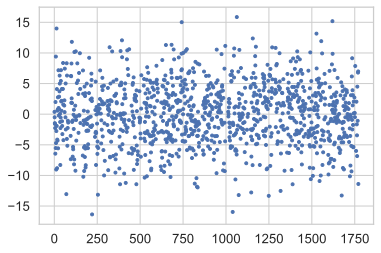

In [237]:
plt.plot(full_pure_pre_2020["Win_Diff"], '.')

In [239]:
full_pure_2020["Wins_Predicted"] = win_model.predict(full_pure_2020[combined_features_nopa])
full_pure_2020["Wins_Extrapolated"] = full_pure_2020[["W"]]*(162/60);

In [240]:
full_pure_2020["Win_diff"] = full_pure_2020["Wins_Extrapolated"] - full_pure_2020["Wins_Predicted"]

In [241]:
full_pure_2020.sort_values(by=["Win_diff"])

,Year,Team,W,G,PA,1B,2B,3B,HR,BB,...,1B_A,2B_A,3B_A,HR_A,BB_A,SB_A,SO_A,Wins_Predicted,Wins_Extrapolated,Win_diff
1284,2020,PIT,19,60,35.6,4.73,1.27,0.10,0.98,2.78,...,4.466667,1.666667,0.050000,1.333333,4.150000,0.450000,8.933333,73.445583,51.3,-22.145583
1616,2020,TEX,22,60,35.8,4.49,1.33,0.15,1.03,2.78,...,5.033333,1.383333,0.216667,1.350000,3.933333,0.450000,8.150000,72.033082,59.4,-12.633082
94,2020,BAL,25,60,37.4,5.62,1.70,0.12,1.28,2.73,...,5.116667,1.550000,0.166667,1.316667,3.200000,0.383333,8.116667,80.104876,67.5,-12.604876
730,2020,ANA,26,60,38.5,5.18,1.62,0.13,1.42,3.98,...,4.900000,1.766667,0.166667,1.366667,3.316667,0.833333,8.716667,82.435815,70.2,-12.235815
1012,2020,NYM,26,60,38.0,5.86,1.77,0.12,1.43,3.28,...,5.200000,1.883333,0.083333,1.350000,3.650000,0.683333,9.566667,81.825821,70.2,-11.625821
548,2020,DET,23,58,35.8,5.36,1.34,0.21,1.07,2.53,...,5.448276,1.672414,0.120690,1.568966,3.310345,0.689655,7.655172,71.645283,62.1,-9.545283
165,2020,BOS,24,60,38.4,5.76,1.97,0.12,1.35,3.12,...,6.066667,1.966667,0.116667,1.633333,4.200000,0.550000,8.950000,73.823234,64.8,-9.023234
0,2020,ARI,25,60,37.3,5.18,1.68,0.20,0.97,3.02,...,4.733333,1.966667,0.183333,1.550000,3.916667,0.666667,8.733333,75.043160,67.5,-7.543160
678,2020,KCR,26,60,36.7,5.21,1.62,0.12,1.13,2.87,...,5.650000,1.333333,0.083333,1.266667,3.516667,0.283333,8.616667,76.839813,70.2,-6.639813
1720,2020,WSN,26,60,37.0,5.48,1.87,0.20,1.10,3.20,...,5.783333,1.683333,0.100000,1.566667,3.600000,0.766667,8.466667,76.084518,70.2,-5.884518


# From Run Difference to Wins

In [ ]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
x = full_baseball_df[["RD"]]

# Choose the response variable
y = full_baseball_df["W"]

# Fit the model 
avg_to_run_model = lr.fit(x, y)
lr.score(x, y)

In [ ]:
lr.intercept_, lr.coef_

### Equation
wins = (16.75 * run_difference) + 80.84